# Importing all the data:

In [1]:
import pandas as pd
import numpy.random
from sklearn import linear_model
import matplotlib.pyplot
%pylab inline

# I started by importing all of the data from the SF bay area water website, and then narrowed it down later.

water_data = pd.read_csv('../Desktop/water_data.csv', sep=',', encoding='utf-8')

water_data.head()


Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,22,23,26,27,28,30,31,32,33,35,44,50,51,52,53,54,55,58,59,60,61,62,63,64,65,66,67,68,70,71,72,76,80,82,86,87,88,89,91,92,97,98,99,100,102,104,112) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,resultrowid,toxpointsummaryrowid,testmaterial,program,programcode,parentprojectcode,parentproject,projectcode,project,protocol,...,sourcerdc,datausenotes,sm_geom,regional_board,countynum,county_name,huc8_name,huc10_name,huc12_name,baysegment_name
0,010CF4BD-1338-44D2-BE98-E6FBBF83FC24,NaN,field,2004-2011 Acterra,2004_11_Acterra,2004_11_Acterra,2004-2011 Acterra,2004_11_acterra_water,2004-2011 Acterra Water Quality,Not Recorded,...,SFEI,NaN,010100002031BF0D0053DDB67E11EB69C173C1ACBD8327...,2.0,43.0,Santa Clara,Coyote,Saratoga Creek-Frontal San Francisco Bay Estua...,Stevens Creek,NaN
1,049DAEBC-D5BE-41D7-8136-6219EC98AAA0,NaN,field,2004-2011 Acterra,2004_11_Acterra,2004_11_Acterra,2004-2011 Acterra,2004_11_acterra_water,2004-2011 Acterra Water Quality,Not Recorded,...,SFEI,NaN,010100002031BF0D0053DDB67E11EB69C173C1ACBD8327...,2.0,43.0,Santa Clara,Coyote,Saratoga Creek-Frontal San Francisco Bay Estua...,Stevens Creek,NaN
2,0619C3C2-4B3D-483E-BB4A-6AF41B9F542F,NaN,field,2004-2011 Acterra,2004_11_Acterra,2004_11_Acterra,2004-2011 Acterra,2004_11_acterra_water,2004-2011 Acterra Water Quality,Not Recorded,...,SFEI,NaN,010100002031BF0D001248B45183EB69C1C36C7B9BF717...,2.0,43.0,Santa Clara,Coyote,Saratoga Creek-Frontal San Francisco Bay Estua...,Stevens Creek,NaN
3,080380C4-9F15-418A-A6F9-2C5987FA3373,NaN,field,SF Bay Regional Monitoring for Water Quality,SF Bay RMP,RMP_ST,Regional Monitoring Program - Status and Trends,95RMP2ST,1995 RMP Status and Trends,RMP,...,SFEI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0879E489-D237-4270-BB55-4DEB4D08B948,NaN,field,2004-2011 Acterra,2004_11_Acterra,2004_11_Acterra,2004-2011 Acterra,2004_11_acterra_water,2004-2011 Acterra Water Quality,Not Recorded,...,SFEI,NaN,010100002031BF0D003A1BC5F7A9EA69C15FD29697121B...,2.0,43.0,Santa Clara,Coyote,Saratoga Creek-Frontal San Francisco Bay Estua...,Stevens Creek,NaN


# Cleaning up and organizing data (data processing):

In [2]:
# These were all of the columns I started off by looking at
data = water_data[['stationcode', 'stationname', 'sampledate', 'sampleyear', 'analyte', 'result', 'collectiondepth']]
data.head()

,stationcode,stationname,sampledate,sampleyear,analyte,result,collectiondepth
0,205STE020,La Avenida,3/26/06,2006,pH,8.210,-88.0
1,205STE020,La Avenida,9/17/05,2005,pH,7.770,-88.0
2,SPCWCSTE75,Dam Outlet,11/9/11,2011,pH,7.330,-88.0
3,WCCA3,China Camp A (WCCA3),9/7/95,1995,Hydrogen Sulfide,0.015,5.0
4,SWAMPSTE62,Stevens Creek Blvd.,8/8/10,2010,"Oxygen, Dissolved",10.510,-88.0


In [3]:
# I was especially interested in pH data so I decided to focus on that. I then made a new dataframe with only 
# pH data.

ph = data[data['analyte'] == "pH"]
phstationmonth = []
for index, row in ph.iterrows():
    stationcode = row['stationcode']
    date = row['sampledate']
    year = row['sampleyear']
    phstationmonth.append(stationcode + "-" + date + "-" + str(year))
ph['station/month'] = phstationmonth
ph.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,stationcode,stationname,sampledate,sampleyear,analyte,result,collectiondepth,station/month
0,205STE020,La Avenida,3/26/06,2006,pH,8.21,-88.0,205STE020-3/26/06-2006
1,205STE020,La Avenida,9/17/05,2005,pH,7.77,-88.0,205STE020-9/17/05-2005
2,SPCWCSTE75,Dam Outlet,11/9/11,2011,pH,7.33,-88.0,SPCWCSTE75-11/9/11-2011
9,541MER531,Salt Slough @ Lander Avenue,4/23/13,2013,pH,6.70,0.1,541MER531-4/23/13-2013
13,205STE020,La Avenida,5/21/06,2006,pH,8.19,-88.0,205STE020-5/21/06-2006


In [4]:
# I also decided to look at dissolved oxygen data, so I made a new dataframe for that also.

oxygen = data[data['analyte'] == "Oxygen, Dissolved"]
stationmonth = []
for index, row in oxygen.iterrows():
    stationcode = row['stationcode']
    date = row['sampledate']
    year = row['sampleyear']
    stationmonth.append(stationcode + "-" + date + "-" + str(year))
oxygen['station/month'] = stationmonth
oxygen.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,stationcode,stationname,sampledate,sampleyear,analyte,result,collectiondepth,station/month
4,SWAMPSTE62,Stevens Creek Blvd.,8/8/10,2010,"Oxygen, Dissolved",10.51,-88.0,SWAMPSTE62-8/8/10-2010
5,205STE020,La Avenida,9/13/09,2009,"Oxygen, Dissolved",10.49,-88.0,205STE020-9/13/09-2009
14,SWAMPSTE62,Stevens Creek Blvd.,4/12/11,2011,"Oxygen, Dissolved",11.58,-88.0,SWAMPSTE62-4/12/11-2011
16,205STE100,Moss Rock,8/14/11,2011,"Oxygen, Dissolved",9.98,-88.0,205STE100-8/14/11-2011
23,541MER535,San Luis Drain @ Terminus,5/22/12,2012,"Oxygen, Dissolved",12.00,0.1,541MER535-5/22/12-2012


In [5]:
# This block of code goes through both the ph and dissolved oxygen dataframes and then matches up the pH
# measurement for a certain station at a certain date with the oxygen dissolved measurement of that same
# station and date. This is so I can plot the two against each other and make sure the cities/dates match up.

shared = []
ph_results_1 = []
oxygen_results_1 = []
ph_results_2 = []
oxygen_results_2 = []
ph_results_3 = []
oxygen_results_3 = []
ph_results_4 = []
oxygen_results_4 = []
ph_results = []
oxygen_results = []
for index, row in oxygen.iterrows():
    oxygen_match = oxygen.loc[oxygen['station/month']==row['station/month']]
    oxygen_result_mean = oxygen_match['result'].mean()
    ph_match = ph.loc[ph['station/month']==row['station/month']]
    ph_result_mean = ph_match['result'].mean()
    shared.append(row['station/month'])
    month = int(row['sampledate'].split('/')[0])
    if oxygen_result_mean < 100:
        if (month > 0 and month < 3):
            oxygen_results_1.append(oxygen_result_mean)
            ph_results_1.append(ph_result_mean)
            
        elif (month > 2 and month < 6):
            oxygen_results_2.append(oxygen_result_mean)
            ph_results_2.append(ph_result_mean)
            
        elif (month > 5 and month < 9):
            oxygen_results_3.append(oxygen_result_mean)
            ph_results_3.append(ph_result_mean)
        
        elif (month > 8 and month < 12):
            oxygen_results_4.append(oxygen_result_mean)
            ph_results_4.append(ph_result_mean)
        elif (month == 12):
            oxygen_results_1.append(oxygen_result_mean)
            ph_results_1.append(ph_result_mean)
            
        #oxygen_results.append(oxygen_result_mean)
        #ph_results.append(ph_result_mean)
    
    
            

# Plotting dissolved water by pH level (colors indicate seasons)

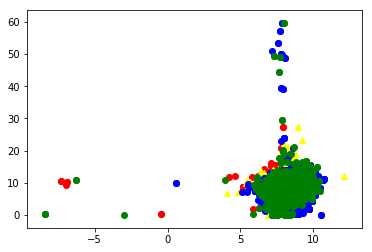

In [33]:
# I chose to plot colors to see if I could cluster anything based off of that, but it turned out
# to not really have a correlation.

matplotlib.pyplot.scatter(ph_results_1, oxygen_results_1, color = 'red', marker="o")
matplotlib.pyplot.scatter(ph_results_2, oxygen_results_2, color = 'yellow', marker="^")
matplotlib.pyplot.scatter(ph_results_3, oxygen_results_3, color = 'blue', marker="o")
matplotlib.pyplot.scatter(ph_results_4, oxygen_results_4, color = 'green', marker="o")

matplotlib.pyplot.show()

# Using Kmeans on the data above

In [53]:
from sklearn.cluster import KMeans
import matplotlib.pyplot

FIGURES_PER_ROW = 3 
MAX_CLUSTERS = 6 

# getting right data
ph_ox_df = pd.DataFrame()
ph_ox_df['ph_data'] = ph_results_1 + ph_results_2 + ph_results_3 + ph_results_4
ph_ox_df['oxygen_data'] = oxygen_results_1 + oxygen_results_2 + oxygen_results_3 + oxygen_results_4


def add_plot(figure, subplot_num, subplot_name, data, labels):

    # create a new subplot
    axis = figure.add_subplot(FIGURES_PER_ROW, MAX_CLUSTERS / FIGURES_PER_ROW, subplot_num)

    # Plot three of the four features on the graph, and set the color according to the labels
    axis.scatter(data['ph_data'], data['oxygen_data'], c=labels)

    # label the subplot
    axis.title.set_text(subplot_name)

data_final = ph_ox_df.dropna()

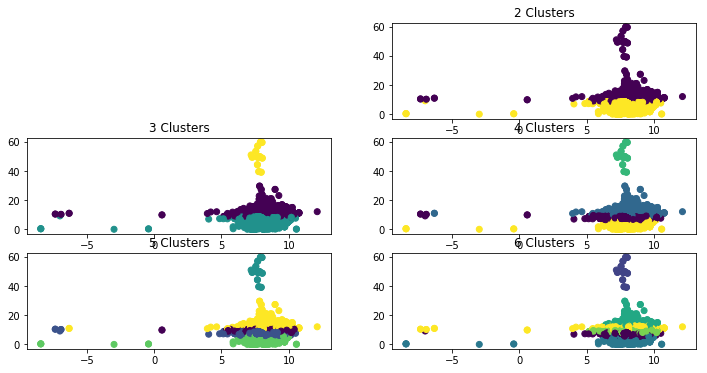

In [54]:
figure = matplotlib.pyplot.figure(figsize=(4*FIGURES_PER_ROW, MAX_CLUSTERS))

for num_clusters in range(2, MAX_CLUSTERS + 1):
    # train the model
    model = KMeans(n_clusters=num_clusters)
    model.fit(data_final)
    # get the predictions of which cluster each input is in
    labels = model.labels_

    add_plot(figure, num_clusters, '{} Clusters'.format(num_clusters), data_final, labels.astype(numpy.float))

# More data organization

In [55]:
# Because there wasn't much clustering in the example above, I decided to look at just pH data vs. time. This
# is the data processing transformations that got me the data I wanted to plot for that.

date_results = []
ph_results = []
for index, row in ph.iterrows():
    ph_match = ph.loc[ph['station/month']==row['station/month']]
    ph_result_mean = ph_match['result'].mean()
    month = int(row['sampledate'].split('/')[0])
    year = int(row['sampleyear'])
    if (ph_result_mean) < 15 and ph_result_mean > 1:
        ph_results.append(ph_result_mean)
        date_results.append(12*year+month-1)

# Plotting pH and date (in months—I multiplied the year number by 12 then added months)

In [ ]:
matplotlib.pyplot.scatter(ph_results, date_results, color = 'red', marker="o")
matplotlib.pyplot.show()

# Clustering the above data

In [56]:
ph_date = pd.DataFrame()
ph_date['ph_data'] = ph_results
ph_date['dates'] = date_results

def add_plot1(figure, subplot_num, subplot_name, data, labels):

    # create a new subplot
    axis = figure.add_subplot(FIGURES_PER_ROW, MAX_CLUSTERS / FIGURES_PER_ROW, subplot_num)

    # Plot three of the four features on the graph, and set the color according to the labels
    axis.scatter(ph_date['ph_data'], ph_date['dates'], c=labels)

    # label the subplot
    axis.title.set_text(subplot_name)

ph_time = ph_date.dropna()


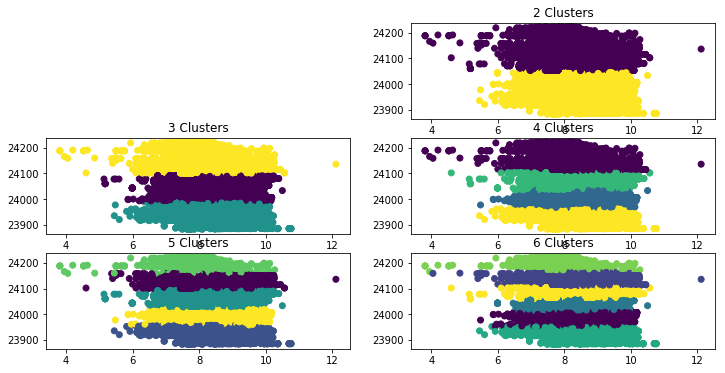

In [58]:
figure = matplotlib.pyplot.figure(figsize=(4*FIGURES_PER_ROW, MAX_CLUSTERS))

for num_clusters in range(2, MAX_CLUSTERS + 1):
    # train the model
    model = KMeans(n_clusters=num_clusters)
    model.fit(ph_time)
    # get the predictions of which cluster each input is in
    labels = model.labels_

    add_plot1(figure, num_clusters, '{} Clusters'.format(num_clusters), ph_time, labels.astype(numpy.float))

# More data processing

In [18]:
# The last set of data I wanted to test was just pH versus stationcode. This involved assigning all of the 
# different station code strings to numbers, which you can see below.

from sklearn import preprocessing

enc_mjob = preprocessing.LabelEncoder()
encoded_mjob = enc_mjob.fit_transform(ph['stationcode'])

ph['station'] = encoded_mjob

ph


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,stationcode,stationname,sampledate,sampleyear,analyte,result,collectiondepth,station/month,station
0,205STE020,La Avenida,3/26/06,2006,pH,8.21,-88.0,205STE020-3/26/06-2006,151
1,205STE020,La Avenida,9/17/05,2005,pH,7.77,-88.0,205STE020-9/17/05-2005,151
2,SPCWCSTE75,Dam Outlet,11/9/11,2011,pH,7.33,-88.0,SPCWCSTE75-11/9/11-2011,940
9,541MER531,Salt Slough @ Lander Avenue,4/23/13,2013,pH,6.70,0.1,541MER531-4/23/13-2013,246
13,205STE020,La Avenida,5/21/06,2006,pH,8.19,-88.0,205STE020-5/21/06-2006,151
19,SWAMPSTE62,Stevens Creek Blvd.,10/10/10,2010,pH,8.16,-88.0,SWAMPSTE62-10/10/10-2010,1044
20,205STE020,La Avenida,2/13/11,2011,pH,8.27,-88.0,205STE020-2/13/11-2011,151
21,205STE100,Moss Rock,6/25/06,2006,pH,9.05,-88.0,205STE100-6/25/06-2006,153
22,SWAMPSTE70,Chestnut Area,3/13/11,2011,pH,7.86,-88.0,SWAMPSTE70-3/13/11-2011,1046
24,205STE020,La Avenida,9/21/08,2008,pH,7.73,-88.0,205STE020-9/21/08-2008,151


In [25]:
xvals = []
yvals = []
for index, row in ph.iterrows():
    if row['result'] < 15:
        xvals.append(row['station'])
        yvals.append(row['result'])
        if (row['result'] < 0):
            print(row) # I found some pH data which was less than zero that didn't really make sense so I decided
                        # to print it out. I think that it was just incorrectly calculated data (there is a 
                        # chance they accidentally added a negative)

stationcode                     SWAMPSTE62
stationname            Stevens Creek Blvd.
sampledate                         12/7/09
sampleyear                            2009
analyte                                 pH
result                                -7.3
collectiondepth                        -88
station/month      SWAMPSTE62-12/7/09-2009
station                               1044
Name: 34, dtype: object
stationcode                     SPCWCSTE55
stationname             West Valley School
sampledate                         12/7/09
sampleyear                            2009
analyte                                 pH
result                               -6.72
collectiondepth                        -88
station/month      SPCWCSTE55-12/7/09-2009
station                                939
Name: 4486, dtype: object
stationcode                    SPCWCSTE75
stationname                    Dam Outlet
sampledate                         9/8/09
sampleyear                           2009
analyte 

# Plotting pH level by place/time (I assigned a number to each one)

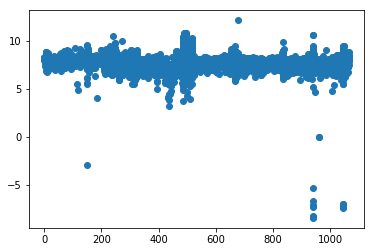

In [24]:
matplotlib.pyplot.scatter(xvals, yvals, marker="o")
matplotlib.pyplot.show()